In [51]:
import numpy as py
import matplotlib.pyplot as plt
import time

In [52]:
# Define the y concept: x1 + 3 * x2 - 2 > 0
def target_concept(x1, x2):
    return 1 if (x1 + 3 * x2 - 2) > 0 else 0

In [53]:
# Generate 200 random examples (x1, x2) and assign class based on y concept
np.random.seed(0)  # for reproducibility
num_samples = 200
x1_values = np.random.uniform(-5, 5, num_samples)
x2_values = np.random.uniform(-5, 5, num_samples)
Y = np.array([target_concept(x1, x2) for x1, x2 in zip(x1_values, x2_values)])

In [54]:
# Function to train model with batch processing
def train_batch(learning_rate, epochs=100):
    weights = np.random.uniform(-1, 1, 3)  # [w1, w2, bias]
    errors = []
    weight_updates = 0  # To track the number of weight updates
    
    for epoch in range(epochs):
        total_error = 0
        for x1, x2, target in zip(x1_values, x2_values, targets):
            # Calculate output with current weights
            weighted_sum = weights[0] * x1 + weights[1] * x2 + weights[2]
            output = 1 if weighted_sum > 0 else 0

            # Calculate error (delta)
            error = target - output
            total_error += abs(error)

            # Update weights (batch approach - all data presented)
            weights[0] += learning_rate * error * x1
            weights[1] += learning_rate * error * x2
            weights[2] += learning_rate * error  # bias adjustment
            weight_updates += 1  # Increment for each weight update
        
        errors.append(total_error)

    return errors, weights, weight_updates

# Function to train model with incremental (online) processing
def train_incremental(learning_rate, epochs=100):
    weights = np.random.uniform(-1, 1, 3)  # [w1, w2, bias]
    errors = []
    weight_updates = 0  # To track the number of weight updates
    
    for epoch in range(epochs):
        total_error = 0
        for x1, x2, target in zip(x1_values, x2_values, targets):
            # Calculate output with current weights
            weighted_sum = weights[0] * x1 + weights[1] * x2 + weights[2]
            output = 1 if weighted_sum > 0 else 0

            # Calculate error (delta)
            error = target - output
            total_error += abs(error)

            # Update weights (incremental approach - one data point at a time)
            weights[0] += learning_rate * error * x1
            weights[1] += learning_rate * error * x2
            weights[2] += learning_rate * error  # bias adjustment
            weight_updates += 1  # Increment for each weight update
        
        errors.append(total_error)

    return errors, weights, weight_updates

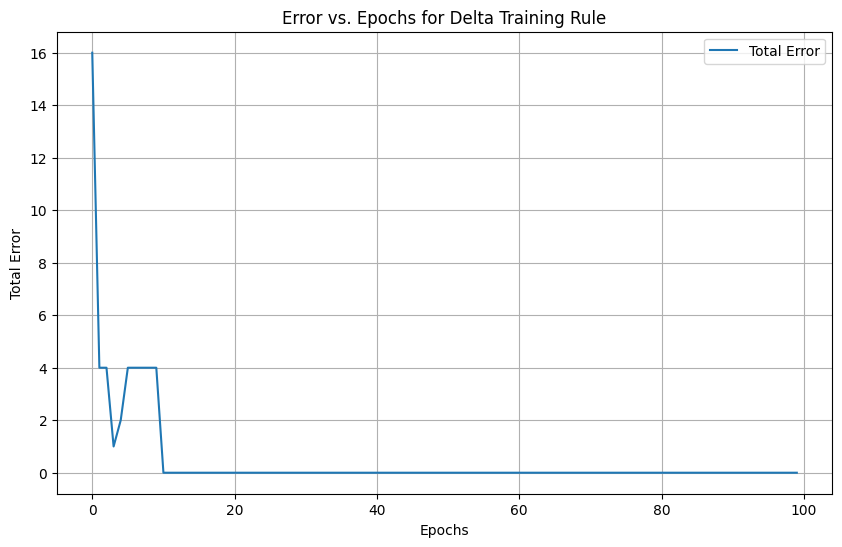

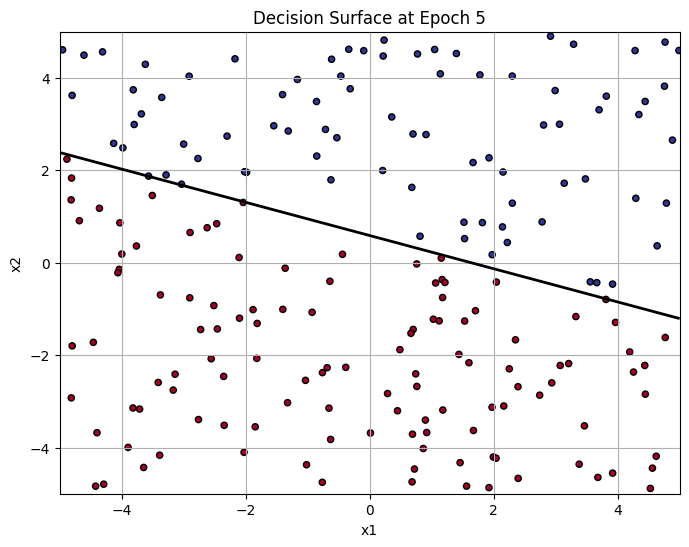

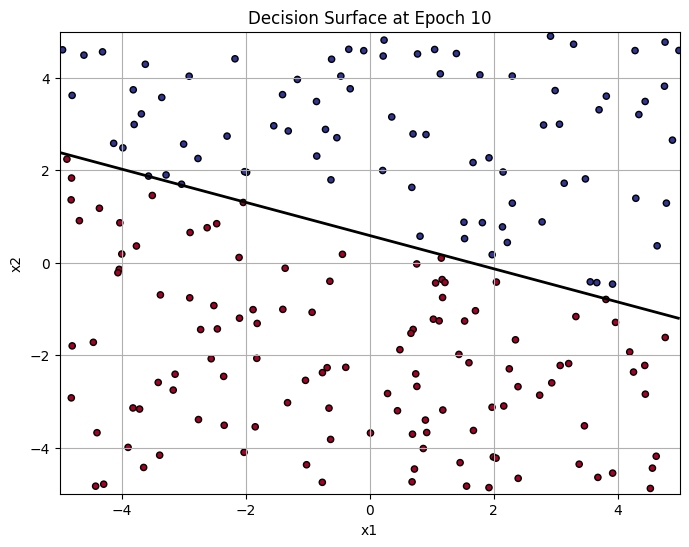

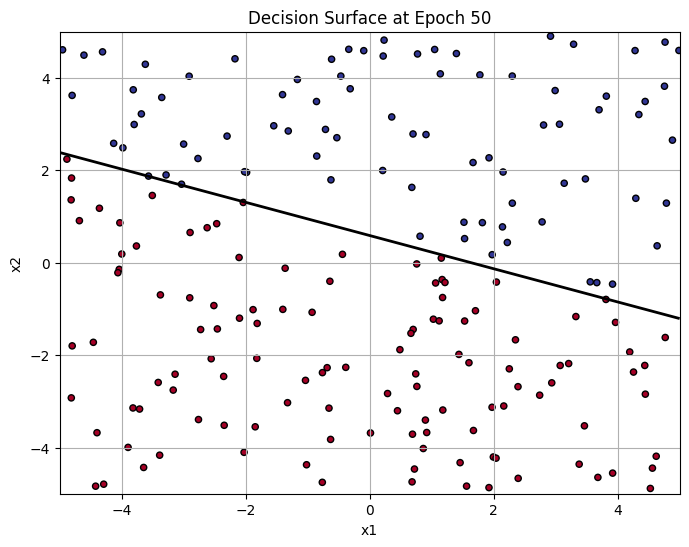

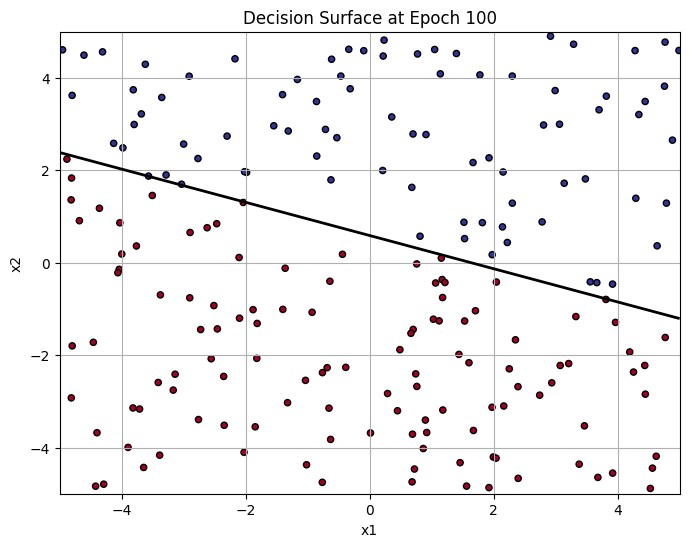

In [55]:
# Training using delta rule
errors, _, _ = train_batch(learning_rate, epochs=100)
# Plot error as a function of epochs
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Total Error')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Error vs. Epochs for Delta Training Rule')
plt.legend()
plt.grid(True)
plt.show()

# Now plot the decision surfaces at 5, 10, 50, 100 iterations
for epoch in [5, 10, 50, 100]:
    # Plot the decision surface after 5, 10, 50, 100 epochs
    plt.figure(figsize=(8, 6))
    plt.scatter(x1_values, x2_values, c=targets, cmap=plt.cm.RdYlBu, s=20, edgecolor='k')
    
    # Create grid for decision surface
    x1_range = np.linspace(-5, 5, 100)
    x2_range = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    Z = weights[0] * X1 + weights[1] * X2 + weights[2]
    
    # Plot the decision boundary
    plt.contour(X1, X2, Z, levels=[0], colors='k', linewidths=2)
    plt.title(f'Decision Surface at Epoch {epoch}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

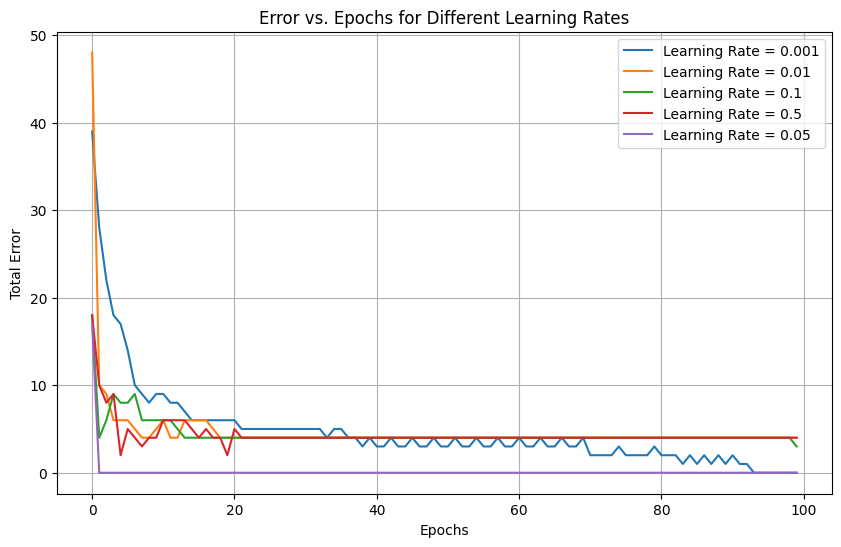

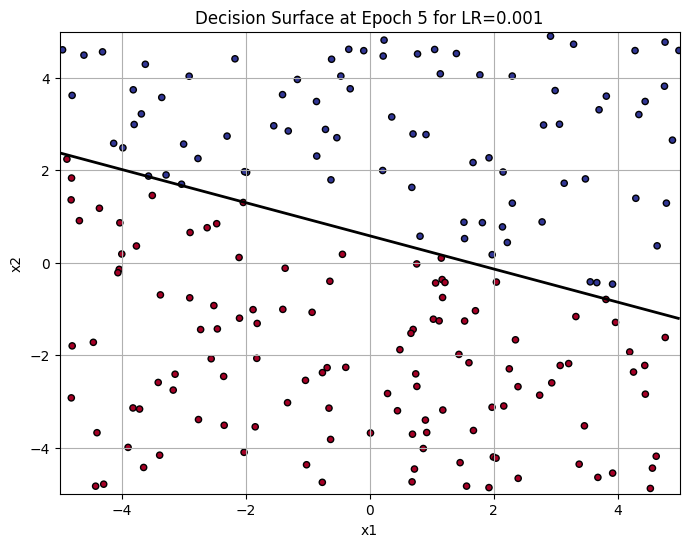

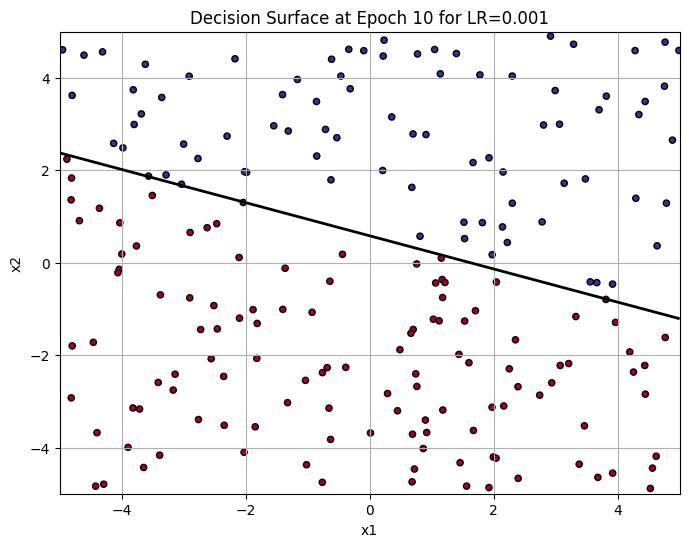

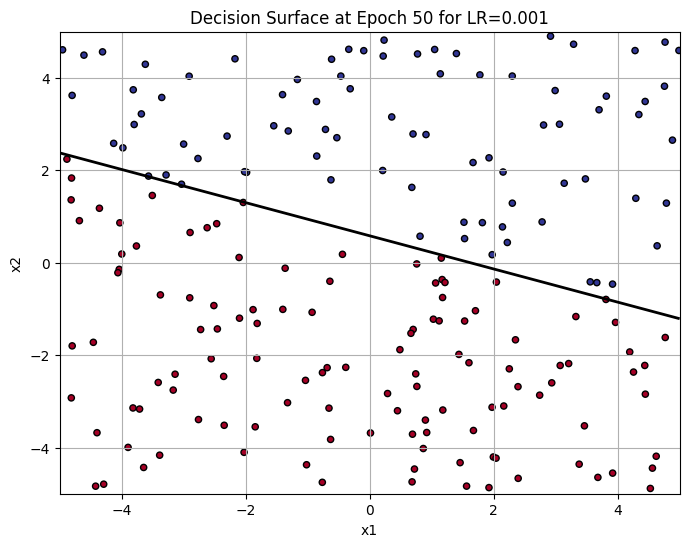

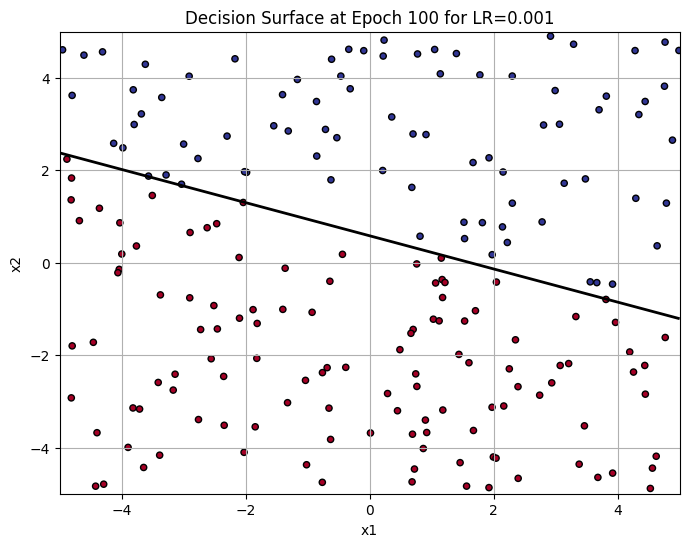

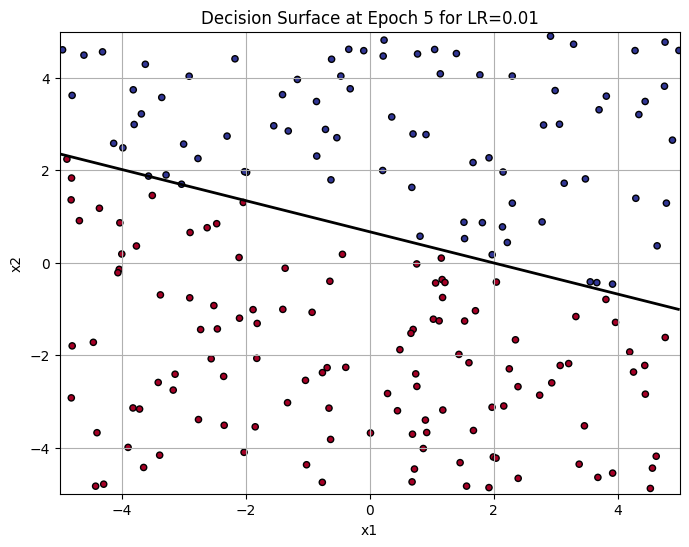

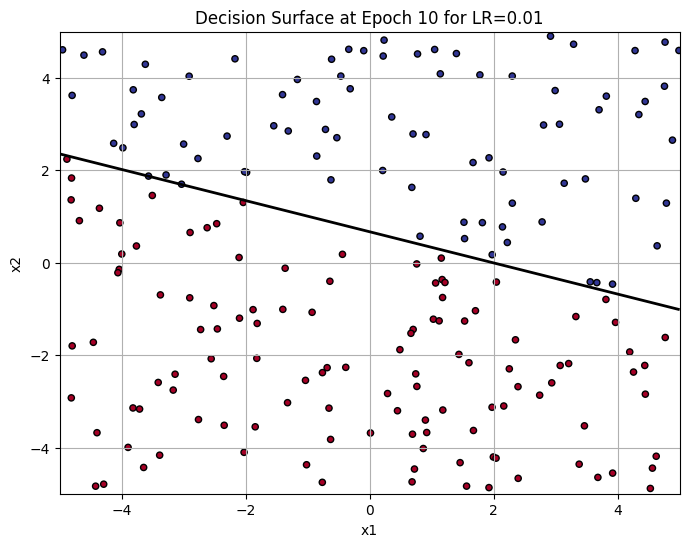

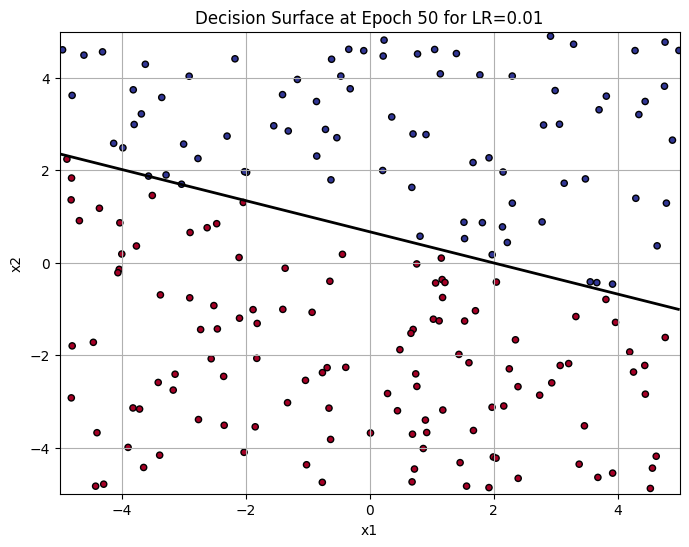

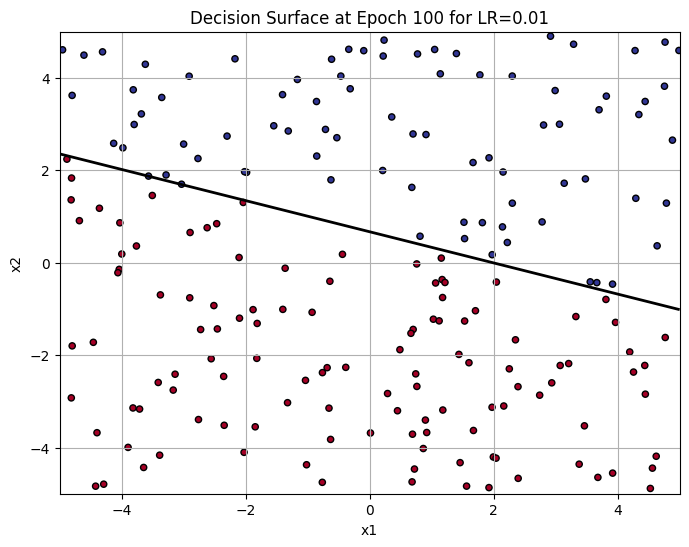

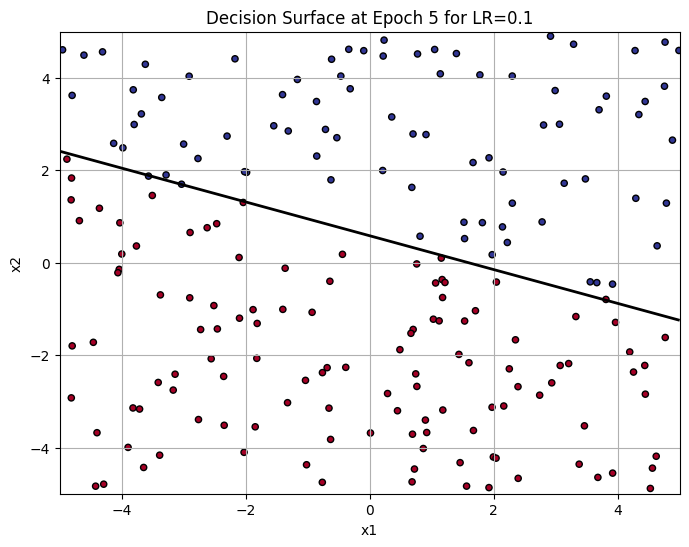

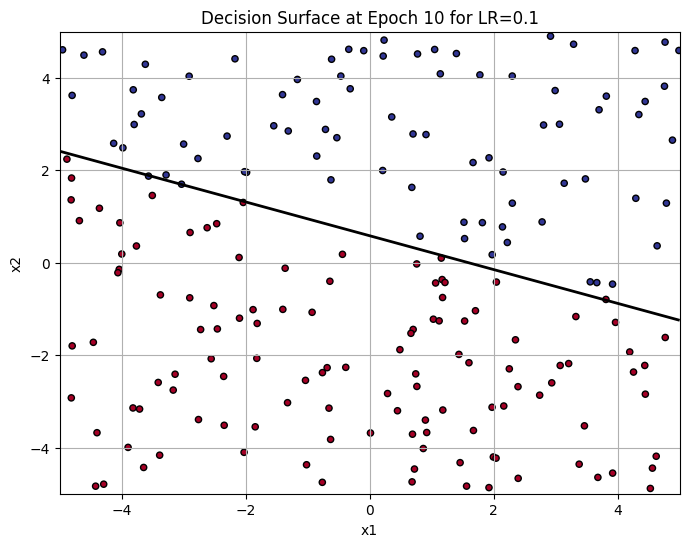

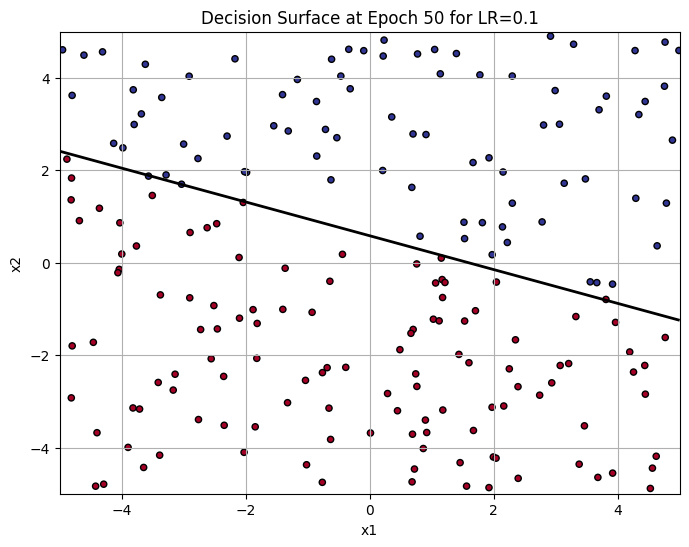

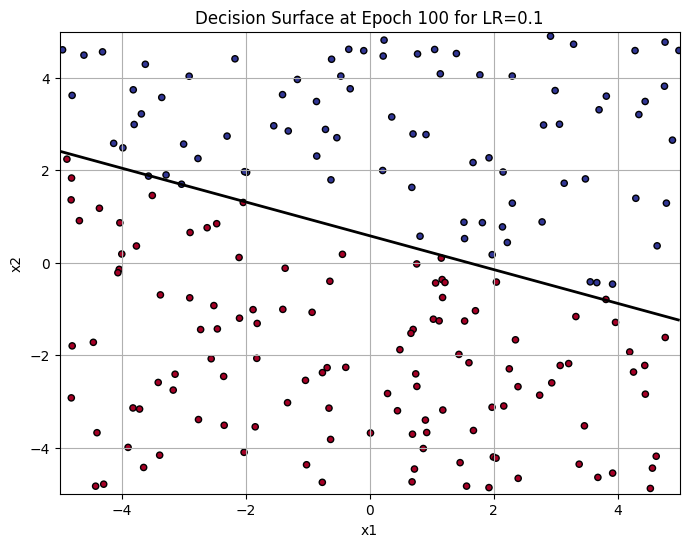

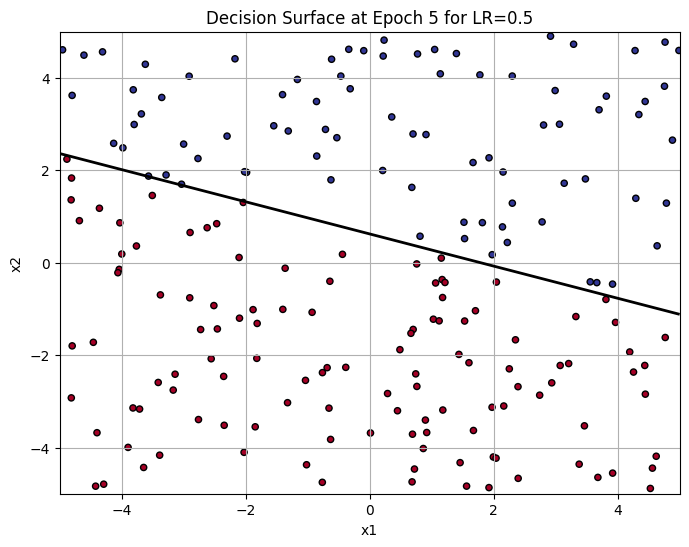

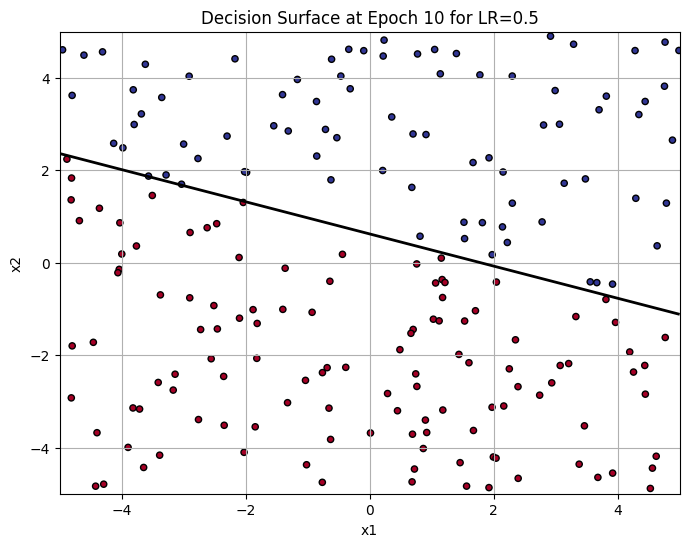

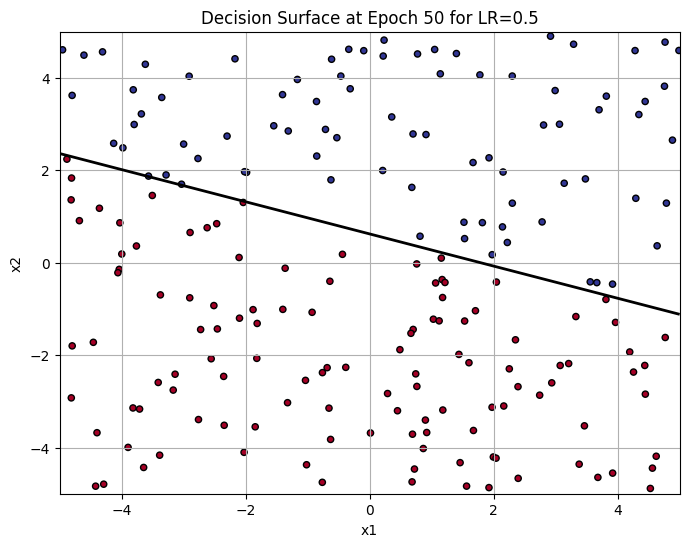

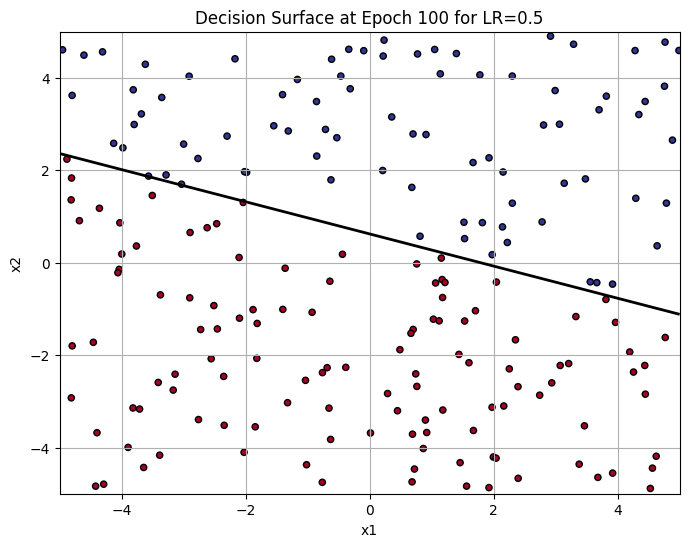

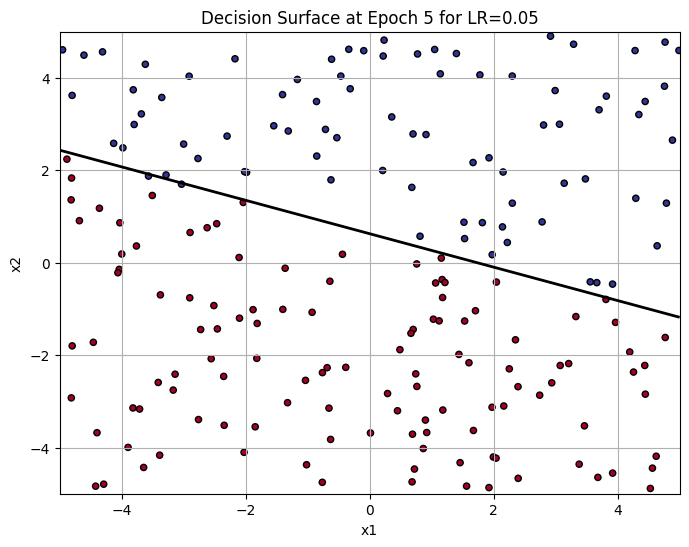

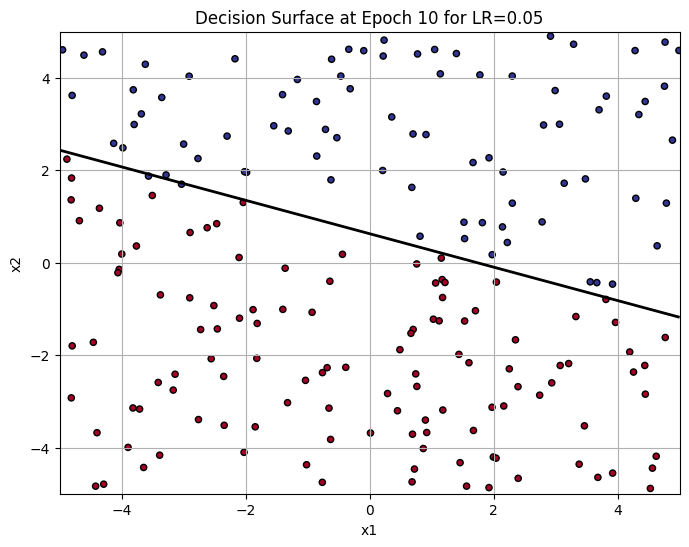

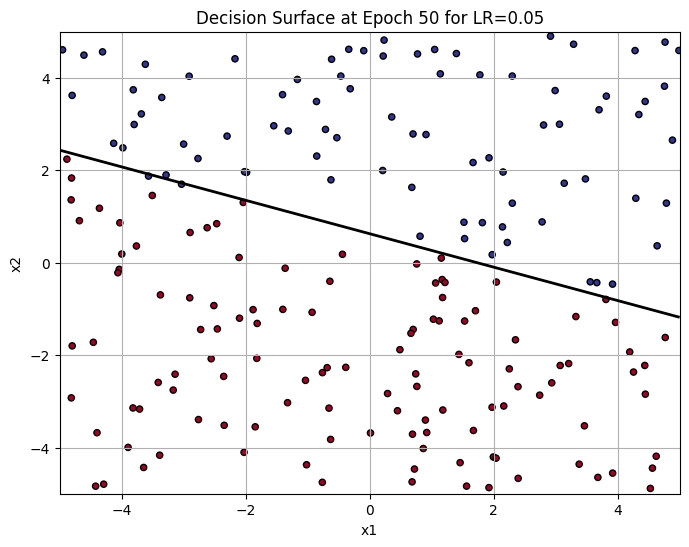

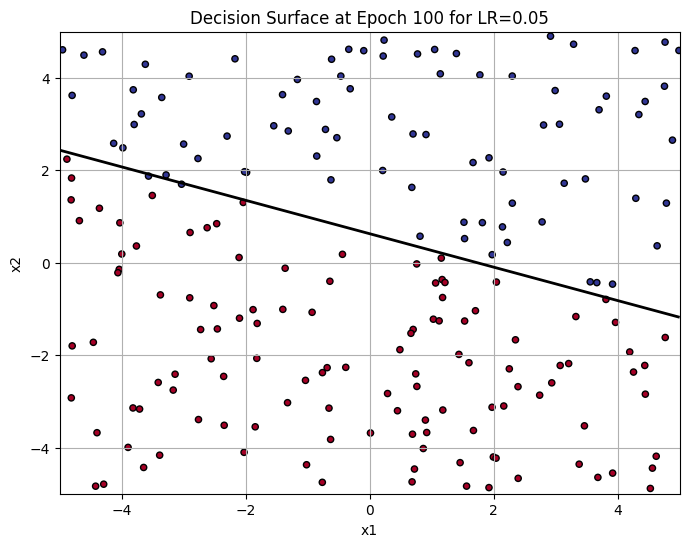

In [56]:
# Learning rates to compare
learning_rates = [0.001, 0.01, 0.1, 0.5, 0.05]
epochs = 100

# Plot error curves for different learning rates
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    errors, _,_ = train_batch(lr, epochs)
    plt.plot(errors, label=f'Learning Rate = {lr}')

plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Error vs. Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Now, we will plot the decision surface at epochs 5, 10, 50, 100 for each learning rate
for lr in learning_rates:
    _, weights,_ = train_batch(lr, epochs)
    
    for epoch in [5, 10, 50, 100]:
        plt.figure(figsize=(8, 6))
        plt.scatter(x1_values, x2_values, c=targets, cmap=plt.cm.RdYlBu, s=20, edgecolor='k')
        
        # Create grid for decision surface
        x1_range = np.linspace(-5, 5, 100)
        x2_range = np.linspace(-5, 5, 100)
        X1, X2 = np.meshgrid(x1_range, x2_range)
        Z = weights[0] * X1 + weights[1] * X2 + weights[2]
        
        # Plot the decision boundary
        plt.contour(X1, X2, Z, levels=[0], colors='k', linewidths=2)
        plt.title(f'Decision Surface at Epoch {epoch} for LR={lr}')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.show()

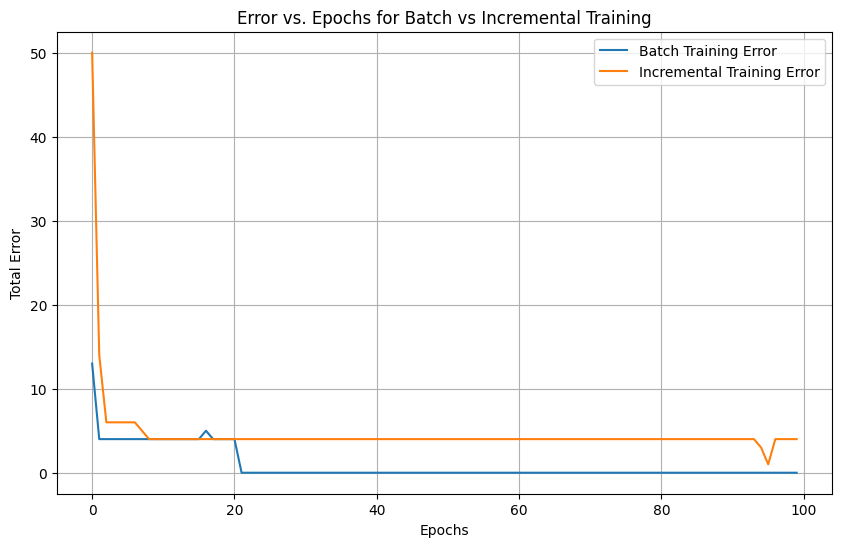

Batch Training Time: 0.2267 seconds
Incremental Training Time: 0.1689 seconds
Number of Weight Updates (Batch): 20000
Number of Weight Updates (Incremental): 20000


In [57]:
# Parameters
learning_rate = 0.01
epochs = 100

# Measure execution time for Batch approach
start_time = time.time()
batch_errors, batch_weights, batch_weight_updates = train_batch(learning_rate, epochs)
batch_time = time.time() - start_time

# Measure execution time for Incremental approach
start_time = time.time()
incremental_errors, incremental_weights, incremental_weight_updates = train_incremental(learning_rate, epochs)
incremental_time = time.time() - start_time

# Plot error vs. epoch for both approaches
plt.figure(figsize=(10, 6))
plt.plot(batch_errors, label='Batch Training Error')
plt.plot(incremental_errors, label='Incremental Training Error')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Error vs. Epochs for Batch vs Incremental Training')
plt.legend()
plt.grid(True)
plt.show()

# Display the results
print(f"Batch Training Time: {batch_time:.4f} seconds")
print(f"Incremental Training Time: {incremental_time:.4f} seconds")
print(f"Number of Weight Updates (Batch): {batch_weight_updates}")
print(f"Number of Weight Updates (Incremental): {incremental_weight_updates}")


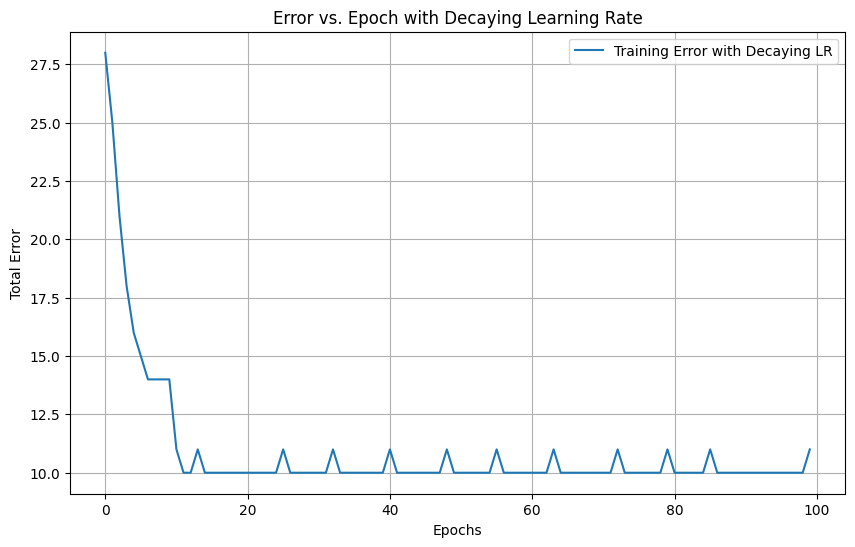

Training Time with Decaying Learning Rate: 0.2022 seconds


In [59]:
# Split data into training and test sets (80/20 split)
train_size = int(0.8 * num_samples)
x1_train, x1_test = x1_values[:train_size], x1_values[train_size:]
x2_train, x2_test = x2_values[:train_size], x2_values[train_size:]
targets_train, targets_test = targets[:train_size], targets[train_size:]

# Function to train model with decaying learning rate
def train_with_decaying_lr(initial_lr, decay_factor, epochs=100):
    weights = np.random.uniform(-1, 1, 3)  # [w1, w2, bias]
    errors = []
    learning_rate = initial_lr
    
    for epoch in range(epochs):
        total_error = 0
        for x1, x2, target in zip(x1_train, x2_train, targets_train):
            # Calculate output with current weights
            weighted_sum = weights[0] * x1 + weights[1] * x2 + weights[2]
            output = 1 if weighted_sum > 0 else 0

            # Calculate error (delta)
            error = target - output
            total_error += abs(error)

            # Update weights
            weights[0] += learning_rate * error * x1
            weights[1] += learning_rate * error * x2
            weights[2] += learning_rate * error  # bias adjustment
        
        errors.append(total_error)
        
        # Decay the learning rate after each iteration
        learning_rate *= decay_factor
    
    return errors, weights

# Parameters
initial_learning_rate = 0.01
decay_factor = 0.8  # Learning rate decays by 20% after each iteration
epochs = 100

# Measure execution time
start_time = time.time()
errors, final_weights = train_with_decaying_lr(initial_learning_rate, decay_factor, epochs)
execution_time = time.time() - start_time

# Plot error vs. epoch
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Training Error with Decaying LR')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Error vs. Epoch with Decaying Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display execution time
print(f"Training Time with Decaying Learning Rate: {execution_time:.4f} seconds")

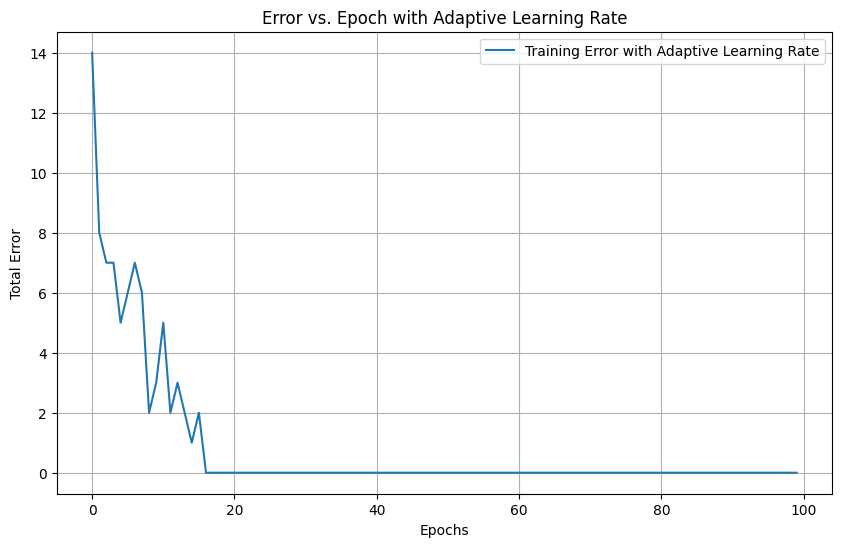

Final Learning Rate: 1.7094
Training Time with Adaptive Learning Rate: 0.2062 seconds


In [60]:
# Function to train model with adaptive learning rate
def train_with_adaptive_lr(initial_lr, t, d, D, epochs=100):
    weights = np.random.uniform(-1, 1, 3)  # [w1, w2, bias]
    errors = []
    learning_rate = initial_lr
    previous_error = float('inf')
    
    for epoch in range(epochs):
        total_error = 0
        for x1, x2, target in zip(x1_train, x2_train, targets_train):
            # Calculate output with current weights
            weighted_sum = weights[0] * x1 + weights[1] * x2 + weights[2]
            output = 1 if weighted_sum > 0 else 0

            # Calculate error (delta)
            error = target - output
            total_error += abs(error)

            # Save the current weights before updating
            old_weights = weights.copy()
            
            # Update weights
            weights[0] += learning_rate * error * x1
            weights[1] += learning_rate * error * x2
            weights[2] += learning_rate * error  # bias adjustment
        
        # Check if new error is greater than the previous error by threshold t
        if total_error - previous_error > t:
            # Discard the weights and decrease the learning rate
            weights = old_weights
            learning_rate *= d
        else:
            # Accept the weights and increase the learning rate
            learning_rate *= D
        
        # Save the error for plotting
        errors.append(total_error)
        previous_error = total_error
    
    return errors, weights, learning_rate

# Parameters
initial_learning_rate = 0.5
threshold_t = 0.03  # Error threshold to decide if learning rate should change
decay_factor_d = 0.9  # Decay factor when error increases
increase_factor_D = 1.02  # Increase factor when error decreases
epochs = 100

# Measure execution time
start_time = time.time()
errors, final_weights, final_learning_rate = train_with_adaptive_lr(initial_learning_rate, threshold_t, decay_factor_d, increase_factor_D, epochs)
execution_time = time.time() - start_time

# Plot error vs. epoch
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Training Error with Adaptive Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Error vs. Epoch with Adaptive Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display final learning rate and training time
print(f"Final Learning Rate: {final_learning_rate:.4f}")
print(f"Training Time with Adaptive Learning Rate: {execution_time:.4f} seconds")

In [61]:
!git add main.ipynb

In [65]:
!git commit -m "Delta Training"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/

nothing added to commit but untracked files present (use "git add" to track)


In [66]:
!git push

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 4 threads
Compressing objects: 100% (2/2), done.
error: RPC failed; HTTP 400 curl 22 The requested URL returned error: 400
send-pack: unexpected disconnect while reading sideband packet
Writing objects: 100% (3/3), 1.71 MiB | 3.30 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
fatal: the remote end hung up unexpectedly
Everything up-to-date
